# Movie Recommendation System #

There are three types of recommendation systems:

1. Demographic Filtering Based

2. Content Based:
Here, the metadata of the such games as genre, director, description, actors, etc. for movies, to make these recommendations.

3. Collaborative Based:
Here, we take the similarity between interests of two different users into consideration and provides recommendation based on this matching.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [5]:
df1.columns = ['id','tittle','cast','crew']
df2 = df2.merge(df1, on='id')

In [6]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [7]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [8]:
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


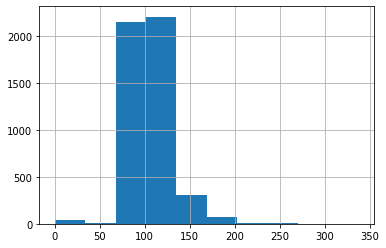

In [9]:
df2['runtime'].hist(bins=10)

In [10]:
df2.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

### Data Cleaning ###

In [11]:
#Removing unneccesary fields

df2 = df2[['budget', 'genres', 'id', 'keywords', 'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average', 'vote_count', 'cast', 'crew']]

df2.head(3)

,budget,genres,id,keywords,original_title,overview,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Content-Based Filtering ##

Here we will have a look at the description of each movie, and find a movie that is most similar to our movie of interest. Working with the description means that we have to implement a TF-IDF algorithm so that we can group movies based on the similarity between their descriptions.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)


With this matrix, we can now calculate the similarity score. There are several ways to calculate that:
1. Cosine Similarity
2. Pearson Similarity
3. Euclidean Similarity

I will be using the cosine similarity for this problem (planning to use the other two methods soon). We used the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate.

Since we already have a matrix ready, I would implement the linear_kernal method from sklearn instead of the cosine_similarities method.

In [13]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

Thus, we get a matrix where the first row is a list of cosine similarity scores for the first movie and so on. If we want the cosine similarity scores for any particular movie, we have to find the index of that movie and extract the row from the matrix for that index.

1. We will now build a function that will take in the title of the movie and the cosine similarity scores for all the movies. 
2. The function will get the index based on the name of the movie. For that index, the function will then fetch the cosine similarity scores from the matrix. 
3. We will then build a list of tuples where the first element is the index of the movie while the second element is the cosine similarity score. 
4. Next, we sort the list of tuples according to the cosine values which gets us the list of movies in order of their relation to our movie of interest. 
5. We then eliminate the first element since that element will be our movie of interest (since the movie has maximum association with itself). 
6. Finally, we can take the first 10 tuples from the list which will have the title indices of the most similar ten movies related to our movie of interest.

In [14]:
cosine_sim.shape

(4803, 4803)

In [15]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

We can pass any movie name to this function, and we will get the ten most similar movies. Let us try this out.

In [16]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

In the above case, we used the descriptions to group the movies. Instead, we can also use the actors, directors or movie keywords from our dataset.

For this, we first need to parse the four columns and extract their corresponding python objects.

In [17]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

Next, we will extarct the names of all the directors.

In [18]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

Then, we build a 

In [20]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [21]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [22]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


Let us compare it to how our data looked before.

In [28]:
df1.iloc[:2,1:].head()

,tittle,cast,crew
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


We see that the columns 'title', 'cast', 'keywords' and 'genres' are converted into a form which can be used to gain inference.


Now that we have these columns ready, we can clean the data.

In [23]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [31]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

Now we have all our data ready. Next, we will create a string of datapoints for each movie which we will then send to the vectorizer as input. Here, we will use the CountVectorizer() instead of TF-IDF, since we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

In [33]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

We can now reuse our get_recommendations() function by passing in the new cosine_sim2 matrix as your second argument.

In [39]:
get_recommendations('Avengers: Age of Ultron', cosine_sim2)

16                        The Avengers
79                          Iron Man 2
26          Captain America: Civil War
126               Thor: The Dark World
182                            Ant-Man
203                                 X2
511                              X-Men
31                          Iron Man 3
33               X-Men: The Last Stand
36     Transformers: Age of Extinction
Name: title, dtype: object

Thus, we can see that when we try to check the movies related to Avengers (which is a movie by Marvel), we get all the movies that are produced by Marvel.

## Collaborative Filtering ##

There is one small issue with the content-based method. This method takes the similarity of movies into consideration, but pays no attention to the individual who is watching that movie.

Thus, we should build a recommender system that can actually recommend the user movies that he will like, and not the movies that are similar to the movies he has watched. This will help us build a deeper connect to the user's interests.\

This is where the Collaborative Filtering technique comes into play.

There are two ways we can build a CF based recommender system:
1. User Based Filtering:

Here we will take the similarity of the users into consideration. For example, if a person A 

2. Item Based Filtering:



In [40]:
import numpy
sum(numpy.array([1,3,4]) < numpy.array([4,6,3]))

2